In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CVPR/mid/csv/data3.csv")
df.head()
df.head(df.shape[0])

,X,Y,LABEL
0,-13,-96,2
1,-42,80,1
2,-41,-21,1
3,-7,-70,2
4,90,-33,4
...,...,...,...
295,-100,17,0
296,-12,-39,2
297,-72,36,0
298,68,-20,4


In [ ]:
# A function for 1-hot encoding the output labels

def normalize(input):
  if input == 0:
    return [1, 0, 0, 0, 0]
  elif input == 1:
    return [0, 1, 0, 0, 0]
  elif input == 2:
    return [0, 0, 1, 0, 0]
  elif input == 3:
    return [0, 0, 0, 1, 0]
  elif input == 4:
    return [0, 0, 0, 0, 1]

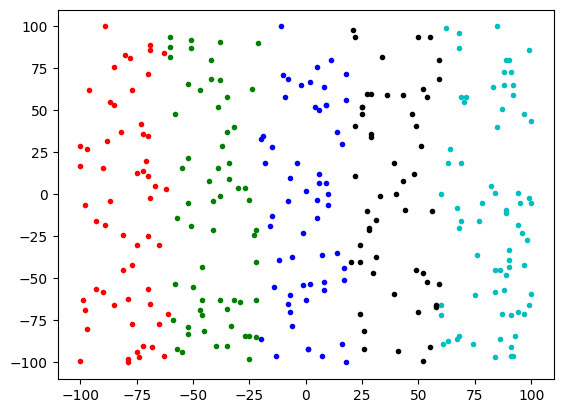

In [ ]:
X1 = df["X"].values.tolist()
X2 = df["Y"].values.tolist()
Y = df["LABEL"].values.tolist()

for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], "r.")
    elif Y[i] == 1:
        plt.plot(X1[i], X2[i], "g.")
    elif Y[i] == 2:
        plt.plot(X1[i], X2[i], "b.")
    elif Y[i] == 3:
        plt.plot(X1[i], X2[i], "k.")
    else:
        plt.plot(X1[i], X2[i], "c.")

In [ ]:
# Zips the 2 input features into a list
features = list(zip(X1, X2))
# Converts the list into a numpy array
features_np = np.array(features)

In [ ]:
# Testing
print(Y)

[2, 1, 1, 2, 4, 3, 2, 4, 4, 3, 1, 4, 3, 1, 2, 2, 0, 2, 4, 2, 0, 0, 0, 2, 3, 1, 4, 2, 0, 0, 0, 1, 1, 3, 2, 1, 4, 3, 4, 2, 3, 1, 2, 2, 1, 0, 0, 3, 4, 4, 1, 4, 0, 0, 1, 1, 4, 4, 2, 2, 4, 1, 0, 2, 4, 2, 4, 4, 4, 0, 4, 2, 4, 3, 4, 2, 4, 0, 1, 1, 3, 4, 1, 3, 4, 2, 2, 3, 4, 0, 0, 4, 2, 2, 0, 1, 0, 2, 4, 4, 3, 3, 1, 4, 4, 4, 1, 0, 1, 3, 3, 1, 0, 4, 3, 1, 0, 4, 0, 3, 1, 0, 0, 0, 0, 0, 2, 1, 2, 4, 1, 4, 0, 0, 1, 3, 2, 1, 1, 4, 1, 1, 0, 1, 2, 0, 1, 2, 1, 2, 1, 4, 2, 0, 2, 3, 2, 4, 2, 2, 4, 3, 2, 4, 3, 3, 0, 0, 4, 0, 4, 0, 0, 0, 2, 3, 1, 3, 3, 1, 4, 4, 3, 3, 3, 2, 4, 2, 3, 3, 1, 0, 3, 2, 2, 2, 0, 0, 3, 1, 2, 1, 3, 4, 1, 3, 3, 4, 3, 0, 4, 3, 4, 1, 3, 3, 4, 1, 2, 4, 4, 1, 4, 2, 4, 1, 3, 0, 0, 4, 0, 4, 4, 1, 2, 1, 3, 1, 1, 0, 2, 3, 1, 1, 0, 3, 0, 4, 2, 1, 1, 4, 0, 1, 2, 0, 3, 0, 2, 1, 4, 3, 3, 2, 4, 4, 1, 0, 3, 0, 2, 1, 2, 3, 2, 0, 3, 3, 2, 4, 4, 3, 1, 1, 0, 0, 1, 1, 4, 3, 4, 4, 4, 4, 2, 0, 2, 0, 4, 2]


In [ ]:
# Normalizing the output labels to be one-hot encoded and
# Turning it into a numpy array

Y2 = np.array([normalize(i) for i in Y])

In [ ]:
# Dividing the total set into training (200) & testing (100) sets

features_train = features_np[:200]
Y2_train = Y2[:200]

features_test = features_np[200:]
Y2_test = Y2[200:]
# print(features_train)
# print(Y_test)

In [ ]:
class NeuralNetwork(object):
    def __init__(self, inputLayerNeurons = 2,
                 hiddenLayer1Neurons = 10,
                 hiddenLayer2Neurons = 10,
                 hiddenLayer3Neurons = 10,
                 outLayerNeurons = 5,
                 learning_rate = 0.01,
                 activation_type: str = 'sigmoid'):

        self.activation_type = activation_type
        self.learning_rate = learning_rate

        # random weight initialization
        self.W_IH1 = np.random.randn(inputLayerNeurons,
                                     hiddenLayer1Neurons)

        self.W_H1H2 = np.random.randn(hiddenLayer1Neurons,
                                      hiddenLayer2Neurons)

        self.W_H2H3 = np.random.randn(hiddenLayer2Neurons,
                                      hiddenLayer3Neurons)

        self.W_H3O = np.random.randn(hiddenLayer3Neurons,
                                     outLayerNeurons)



    def activation(self, x, der=False):
        if self.activation_type == 'sigmoid':
            if der == True:
                return x * (1 - x)
            else:
                return 1 / (1 + np.exp(-x))

        if self.activation_type == "tanh":
            if der == True:
                return 1 - (np.tanh(x))**2                      # 1 - (tanh(x))^2
            else:
                return np.tanh(x)

        if self.activation_type == "relu":
            if der == True:
                return np.where(x > 0, 1, 0)
            else:
                return np.maximum(0, x)

        if self.activation_type == "gaussian":
            if der == True:
                return -(2 * x * np.exp(-x**2))                 # -2xe^(-x^2)
            else:
                return np.exp(-x**2)                            # e^(-x^2)


    def feedForward(self, X):
        hidden1_input = np.dot(X, self.W_IH1)
        self.hidden1_output = self.activation(hidden1_input)

        hidden2_input = np.dot(self.hidden1_output, self.W_H1H2)
        self.hidden2_output = self.activation(hidden2_input)

        hidden3_input = np.dot(self.hidden2_output, self.W_H2H3)
        self.hidden3_output = self.activation(hidden3_input)

        output_input = np.dot(self.hidden3_output, self.W_H3O)
        pred = self.activation(output_input)
        return pred


    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.activation(pred, der=True)

        hidden3_error = output_delta.dot(self.W_H3O.T)
        hidden3_delta = self.learning_rate * hidden3_error * self.activation(self.hidden3_output, der=True)

        hidden2_error = hidden3_delta.dot(self.W_H2H3.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.activation(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H1H2.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.activation(self.hidden1_output, der=True)

        self.W_IH1 += X.T.dot(hidden1_delta)
        self.W_H1H2 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_H2H3 += self.hidden2_output.T.dot(hidden3_delta)
        self.W_H3O += self.hidden3_output.T.dot(output_delta)


    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

In [ ]:
NN = NeuralNetwork(activation_type = 'sigmoid')
# NN = NeuralNetwork(activation_type ='tanh')
# NN = NeuralNetwork(activation_type = 'gaussian')
# NN = NeuralNetwork(activation_type = 'relu')

Epoch: 0, error: 0.24757036133498306
Epoch: 10000, error: 0.09838618334277283
Epoch: 20000, error: 0.0901493466528902
Epoch: 30000, error: 0.08423632535446851
Epoch: 40000, error: 0.08239386303036532
Epoch: 50000, error: 0.08158332271303768
Epoch: 60000, error: 0.08111236173941662
Epoch: 70000, error: 0.08078965896591196
Epoch: 80000, error: 0.08053902378980779
Epoch: 90000, error: 0.0803276396288633


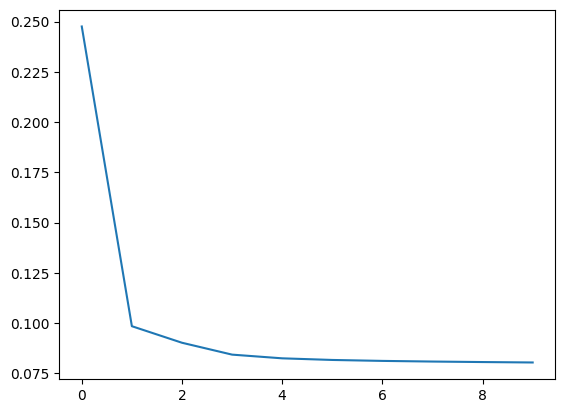

In [ ]:
err_list = []

for i in range(100000):
    NN.train(features_train, Y2_train)
    err = np.mean(np.square(Y2_train - NN.feedForward(features_train)))

    if i % 10000 == 0:
      err_list.append(err)
      print(f'Epoch: {i}, error: {err}')

plt.plot(err_list)
plt.show()

In [ ]:
# Stores a dict with the probability of each class with its class name

def getProb(pred):
    return {f'Class-{index}': p*100 for index, p in enumerate(pred)}

In [ ]:
# Returns the dict key with the highest probablity

def getClass(dict):
  max_key = max(dict, key=dict.get)
  return (max_key)

In [ ]:
# Testing a random input

pred = NN.feedForward([75,-33])
print(pred)
print(getProb(pred))
print(getClass(getProb(pred)))

[0.00095413 0.00234205 0.11206743 0.21853345 0.67674459]
{'Class-0': 0.09541345520663883, 'Class-1': 0.2342048339507667, 'Class-2': 11.206743397057545, 'Class-3': 21.85334468869893, 'Class-4': 67.67445851382952}
Class-4


In [ ]:
predictions = NN.feedForward(features_test)
# print(f"Predictions: {predictions}")

# Calculate recall and F1 score
Y_true = np.argmax(Y2_test, axis=1)
Y_pred = np.argmax(predictions, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
print(f"Overall Accuracy: {accuracy}")

precision = precision_score(Y_true, Y_pred, average=None)
print("Precision for each class:")
for i, score in enumerate(precision):
    print(f"Class {i}: {score}")

recall = recall_score(Y_true, Y_pred, average='macro')
print(f"Recall: {recall}")

f1 = f1_score(Y_true, Y_pred, average='macro')
print(f"F1 Score overall: {f1}")

Overall Accuracy: 0.66
Precision for each class:
Class 0: 0.64
Class 1: 0.7647058823529411
Class 2: 0.875
Class 3: 0.5
Class 4: 0.6785714285714286
Recall: 0.6559171122994651
F1 Score overall: 0.6505390835579515


In [ ]:
# F1 score fr each class

f1_scores = f1_score(Y_true, Y_pred, average=None)

print("F1 Scores for each class:")
for i, score in enumerate(f1_scores):
    print(f"Class {i}: {score}")

F1 Scores for each class:
Class 0: 0.7619047619047621
Class 1: 0.6666666666666667
Class 2: 0.5833333333333334
Class 3: 0.5238095238095238
Class 4: 0.7169811320754718


In [ ]:
# Confusion matrix

def conf(Y_true, Y_pred, c = 'magma'):
    conf_matrix = confusion_matrix(Y_true, Y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plotting
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=c)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
# ROC graph

def roc_plot(Y2_test, Y_pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(Y2_test.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(Y2_test[:, i], Y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    #ROC curve for each class
    for i in range(Y2_test.shape[1]):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
predictions = NN.feedForward(features_test)

Y_true = np.argmax(Y2_test, axis=1)
Y_pred = np.argmax(predictions, axis=1)

Confusion Matrix:
[[16  1  0  0  0]
 [ 9 13  0  0  0]
 [ 0  3  7  5  1]
 [ 0  0  1 11  8]
 [ 0  0  0  6 19]]


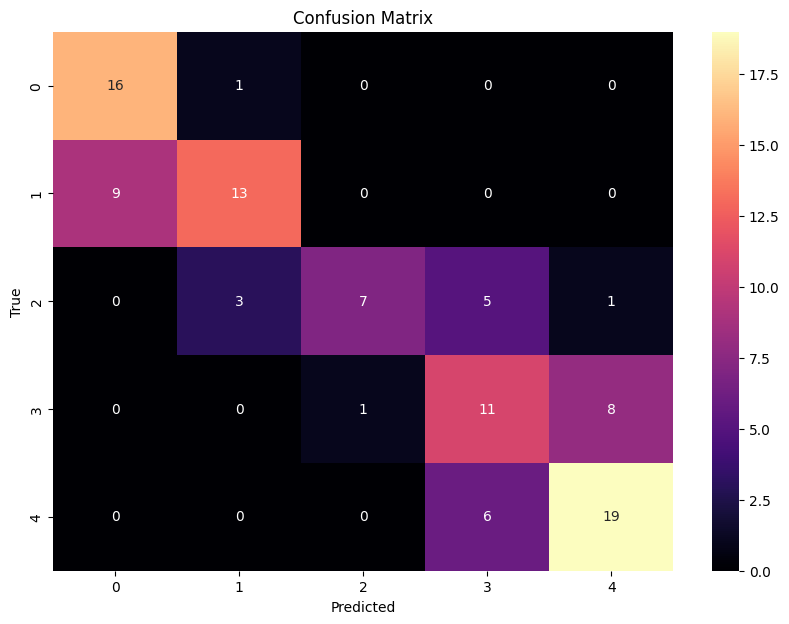

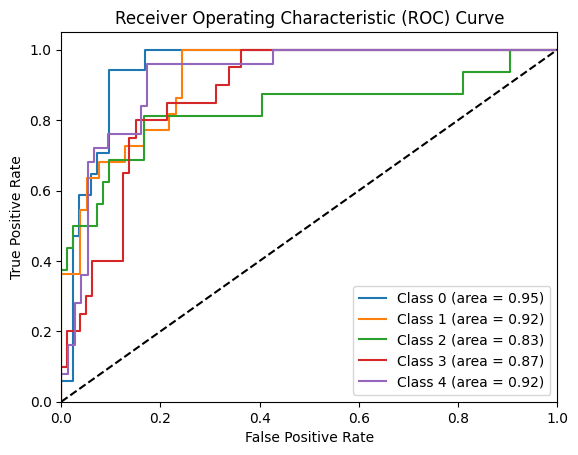

In [ ]:
conf(Y_true, Y_pred)

print()

roc_plot(Y2_test, predictions)

In [ ]:
NN_1 = NeuralNetwork(inputLayerNeurons = 2,
                     hiddenLayer1Neurons = 60,
                     hiddenLayer2Neurons = 60,
                     hiddenLayer3Neurons = 60,
                     outLayerNeurons = 5,
                     learning_rate = 0.001,
                     activation_type= 'sigmoid')

for i in range(100000):
    NN_1.train(features_train,Y2_train)
    err = np.mean(np.square(Y2_train - NN_1.feedForward(features_train)))

    if i % 10000 == 0:
      err_list.append(err)
      print(f'Epoch: {i}, error: {err}')

Epoch: 0, error: 0.3819430958270694
Epoch: 10000, error: 0.10408802117854472
Epoch: 20000, error: 0.09724862616746047
Epoch: 30000, error: 0.06818767222420227
Epoch: 40000, error: 0.06547027629384075
Epoch: 50000, error: 0.06358111021003514
Epoch: 60000, error: 0.06207958102133226
Epoch: 70000, error: 0.06080037151468878
Epoch: 80000, error: 0.05968232074200007
Epoch: 90000, error: 0.05869611601123798


In [ ]:
predictions1 = NN_1.feedForward(features_test)

Y_true1 = np.argmax(Y2_test, axis=1)
Y_pred1 = np.argmax(predictions1, axis=1)

Confusion Matrix:
[[14  3  0  0  0]
 [ 8 14  0  0  0]
 [ 0  3  8  4  1]
 [ 0  0  1 15  4]
 [ 0  0  0  5 20]]


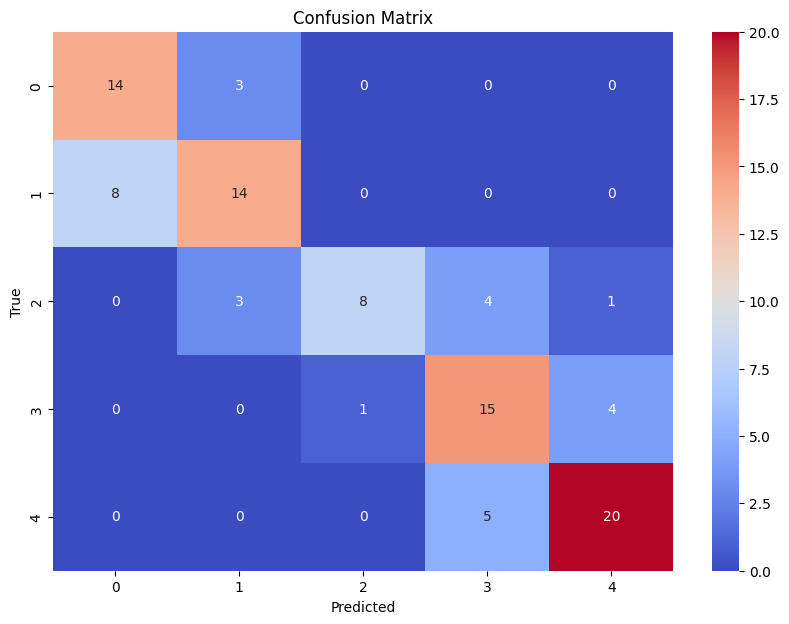

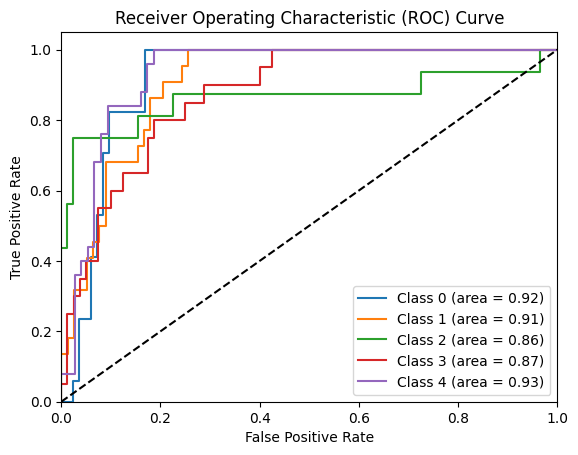

In [ ]:
conf(Y_true1, Y_pred1, 'coolwarm')

print()

roc_plot(Y2_test, predictions1)

In [ ]:
accuracy = accuracy_score(Y_true1, Y_pred1)
print(f"Overall Accuracy: {accuracy}")

precision = precision_score(Y_true1, Y_pred1, average=None)
print("Precision for each class:")
for i, score in enumerate(precision):
    print(f"Class {i}: {score}")

recall = recall_score(Y_true1, Y_pred1, average='macro')
print(f"Recall: {recall}")

f1 = f1_score(Y_true1, Y_pred1, average='macro')
print(f"F1 Score overall: {f1}")

Overall Accuracy: 0.71
Precision for each class:
Class 0: 0.6363636363636364
Class 1: 0.7
Class 2: 0.8888888888888888
Class 3: 0.625
Class 4: 0.8
Recall: 0.7019786096256684
F1 Score overall: 0.7012867132867133
